# meteoblue High-resolution API

In this notebook we show how the outputs of the meteoblue high-resolution API looks like and how data or images can be derived from it.
This API is the interface for getting data or images produced by the meteoblue City-Climate Model (mCCM).


#### meteoblue City-Climate Model (mCCM)

The meteoblue City-Climate model is able to resolve the urban heat island effect and the small-scale air temperature variability in cities by its high resolution of 10 m. This is possible by the interaction of high-resolution satellite data and numerical weather models which are the main driver of the model. Due to the consideration of current meteorological conditions and their effect on the urban air temperature field, the model allows a live representation of the current air temperature distribution in a city.

The model was trained using global urban climate measurement networks and parameterized to be applicable to global cities. Verification of the model shows a significant improvement over coarse numerical weather models and static urban climate analyses.

Due to the independence of measurements, it is possible to do temperature forecasts up to 7 days in advance and thus also to issue the heat risk for individual buildings or city districts.

#### Time horizon

The high-resolution API is designed for operational use cases, to request map data, point data, or images for live applications. It is also possible to get data for the **last 72 hours** and as **forecast** (depending on city, actually Zürich is available with a 72 hours forecast).

#### End points
The following five endpoints and data packages are available in the high-resolution API:

*/v1/city_domains*
- Available cities: number of cities available in the API including the extent of the city.

*/v1/images*
- Images: JPEGs of high-resolution air temperatures in 10 x 10 m by predefined colors and legends

*/v1/images_meta*
- Images meta information: extent of city and the needed information to reproduce the color legend of the JPEGs (color palette with HEX Codes, minimum and maximum air temperature)

*/v1/data*
- Data: JSONs with raw high-resolution air temperatures in 10 x 10 m for the respective city and timestamp

*/v1/points*
- Points: JSONs with raw high-resolution air temperatures for the respective coordinate in a city and a specific time horizon.

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt
import json
import datetime
import os
from matplotlib.colors import LinearSegmentedColormap

os.environ["TZ"] = "UTC"

#### **City overview**
**EP 1: /v1/city_domains**

No inputs must be set. Just request the JSON with the URL and you will get a JSON which contains the actual list of available cities with their extent.

In [2]:
# request JSON via URL
URL = "http://cityclimateapi-staging.meteoblue.com/v1/city_domains"
response = urllib.request.urlopen(URL)
overview = json.loads(response.read())

In [3]:
# show all available cities
city_overview = [overview["cities"][i]["city"] for i in range(0,len(overview["cities"]),1)]
print(city_overview)

['adelaide', 'antwerp', 'athens', 'auckland', 'barcelona', 'basel', 'berlin', 'bern', 'biel', 'bilbao', 'bologna', 'bordeaux', 'bratislava', 'bremen', 'brisbane', 'brussels', 'bucharest', 'budapest', 'capetown', 'chicago', 'cologne', 'copenhagen', 'dallas', 'darmstadt', 'denver', 'duesseldorf', 'essen', 'frankfurt', 'freiburgimbreisgau', 'gelsenkirchen', 'geneva', 'georgetown', 'graz', 'grenoble', 'hamburg', 'heidelberg', 'innsbruck', 'jakarta', 'kitchener', 'krefeld', 'lausanne', 'leipzig', 'linz', 'lisbon', 'ljubljana', 'london', 'losangeles', 'lucca', 'lucerne', 'lyon', 'mainz', 'marseille', 'mexicocity', 'milan', 'mumbai', 'munich', 'munster', 'nancy', 'nantes', 'newyork', 'nuremberg', 'paris', 'parnu', 'perth', 'phoenix', 'prague', 'rennes', 'rome', 'seattle', 'seville', 'singapore', 'stgallen', 'stockholm', 'stuttgart', 'sydney', 'tallinn', 'thehague', 'tokyo', 'toronto', 'toulouse', 'trento', 'trieste', 'troisrivieres', 'turin', 'ulm', 'vancouver', 'verona', 'vienna', 'washingto

Now, let's get the extent of Ljubljana, Slovenia.

In [4]:
# get extent of ljubljana
city = "ljubljana"
extent = overview["cities"][int(np.where(np.array(city_overview) == city)[0])]["extent"]

print("xmin: "+str(extent[0]))
print("xmax: "+str(extent[2]))
print("ymin: "+str(extent[1]))
print("ymax: "+str(extent[3]))

xmin: 14.39954
xmax: 14.65689
ymin: 45.99783
ymax: 46.13355


#### **Heat map Image**
**EP 2: /v1/images**

With this endpoint you can derive heat map's as JPEG of all available cities up to 72 hours back.

The following inputs are needed:
- City (variable: *city*)
- Timestamp (variable: *time*)

Let's get the newest heat map of Ljubljana and plot it.

Before you can plot the heat you need to request the following endpoint:

**EP 3: /v1/images_meta**

From this endpoint you will get the needed information to reproduce the legend for the heat map for the respective city and timestamp.

In [5]:
# define city and time
city = "ljubljana"
time = pd.to_datetime(datetime.datetime.now()).floor(freq="H")

Let's get the heat map image and the needed meta information.

In [6]:
# define URL for image
time1 = str(time).split(" ")[0]
time2 = time.hour
if time2 < 10:
    time2 = "0"+str(time2)
else:
    time2 = str(time2)

URL = "http://cityclimateapi-staging.meteoblue.com/v1/images?city="+city+"&time="+time1+"%20"+time2+"%3A00%3A00"

# request image by URL
urllib.request.urlretrieve(URL, "image_download")
img = Image.open("image_download")

In [7]:
# define URL for image meta information
URL = "http://cityclimateapi-staging.meteoblue.com/v1/images_meta?city="+city+"&time="+time1+"%20"+time2+"%3A00%3A00"

# request image meta by URL from API
response = urllib.request.urlopen(URL)
img_meta = json.loads(response.read())
print(img_meta)

{'city': 'ljubljana', 'time': '2023-08-30 14:00:00', 'extent': {'xmin': 14.39954, 'xmax': 14.65689, 'ymin': 45.99783, 'ymax': 46.13355}, 'legend': {'color_palette': ['#433543', '#563853', '#5C3959', '#763E70', '#94438C', '#B967B1', '#AF72BD', '#AA96D7', '#A8B8E4', '#A7CDE3', '#95DBD7', '#77CCC6', '#76C0CA', '#73ABC8', '#77A0D0', '#639CA7', '#5E9B90', '#6AA262', '#83A933', '#ABB033', '#CDB933', '#EDC233', '#FBAF33', '#F98A33', '#EE6933', '#B95233', '#974433', '#733933'], 'min': 11.55, 'max': 17.55}}


Let's start with the plotting process.

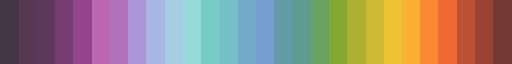

In [8]:
# define coordinates for axis (longitude/latitude) by using the information from the image meta
# longitude
xmin = img_meta["extent"]["xmin"]
xmax = img_meta["extent"]["xmax"]
xticks = np.arange(xmin, xmax, (xmax-xmin)/6)
xticks = [np.round(xticks[i], 2) for i in np.arange(1,6,1)]

# latitude
ymin = img_meta["extent"]["ymin"]
ymax = img_meta["extent"]["ymax"]
yticks = np.arange(ymin, ymax, (ymax-ymin)/6)
yticks = [np.round(yticks[i], 2) for i in np.arange(1,6,1)]

# create x and y coordinates array
xcoords = np.arange(xmin, xmax, (xmax-xmin)/img.size[0])
ycoords = np.arange(ymin, ymax, (ymax-ymin)/img.size[1])

# get indices where ticks have smallest distance
xidx = [np.argmin(abs(xticks[i]-xcoords)) for i in np.arange(0,len(xticks),1)]
yidx = [len(ycoords)-np.argmin(abs(yticks[i]-ycoords)) for i in np.arange(0,len(yticks),1)]

# derive the color palette from the image meta
col_temp = LinearSegmentedColormap.from_list('Heat map color palette',colors=img_meta["legend"]["color_palette"], N=len(img_meta["legend"]["color_palette"]))
col_temp

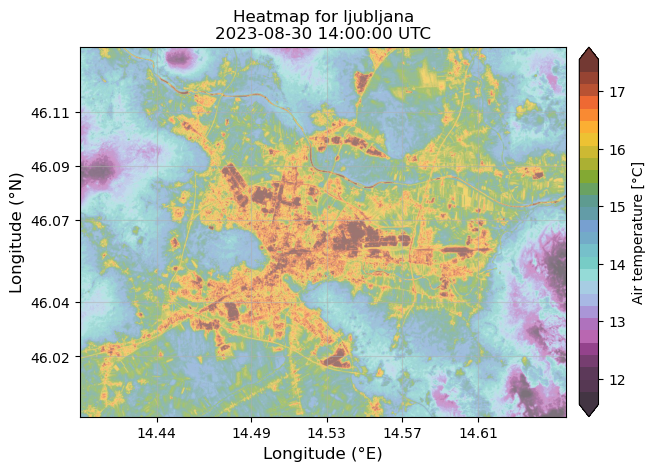

In [9]:
# plot the heat map and insert the colorbar
fig=plt.figure()
ax = plt.axes()
image1 = ax.imshow(img)
image2 = ax.scatter(x = [1,2], y = [1,2], alpha=0, c = [img_meta["legend"]["min"], img_meta["legend"]["max"]], cmap = col_temp)
plt.title("Heatmap for "+city + "\n" + str(time) + " UTC", loc = "center")
cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.03,ax.get_position().height])
cbar = fig.colorbar(image2, drawedges = False, extend = "both", extendfrac = 'auto', cax=cax, label = "Air temperature [\N{DEGREE SIGN}C]")
cbar.solids.set(alpha=1)
for patch in cbar._extend_patches:
    patch.set_alpha(1)
ax.set_xticks(xidx, xticks)
ax.set_xlabel("Longitude (\N{DEGREE SIGN}E)", fontsize = 12)
ax.set_yticks(yidx, yticks)
ax.set_ylabel("Longitude (\N{DEGREE SIGN}N)", fontsize = 12)
ax.grid(alpha = 0.5)

#### **Map Data**
**EP 4: /v1/data**

With this endpoint you can derive raw data within a specified latitude-longitude Box in the available cities.

The following inputs are needed:
- City (variable: *city*)
- Latitude-Longitude Box (variable: *latLonBox*)
- Timestamp (variable: *time*)

Let's get the current temperature data for Ljubljana.

Latitude-Longitude Box: 46.046 (lat_min), 14.503 (lon_min), 46.053 (lat_max), 14.513 (lon_max)

In [10]:
# define input
city = "ljubljana"
latLonBox = [46.046, 14.503, 46.053, 14.513]
time = pd.to_datetime(datetime.datetime.now()).floor(freq="H")

In [11]:
# define URL for image
time1 = str(time).split(" ")[0]
time2 = time.hour
if time2 < 10:
    time2 = "0"+str(time2)
else:
    time2 = str(time2)

URL =  "http://cityclimateapi-staging.meteoblue.com/v1/data?city="+city+"&latLonBox="+str(latLonBox[0])+"%2C%20"+str(latLonBox[1])+"%2C%20"+str(latLonBox[2])+"%2C%20"+str(latLonBox[3])+"&time="+time1+"%20"+time2+"%3A00%3A00"

# request data by URL from API
response = urllib.request.urlopen(URL)
overview = json.loads(response.read())
overview

{'x': [14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50312,
  14.50325,
  14.50325,
  14.50325,
  14.50325,
  14.50325,
  14.50325,

#### **Point Data**
**EP 5: /v1/points**

With this endpoint you can derive raw data for specified locations (coordinates) in the available cities.

The following inputs are needed:
- City (variable: *city*)
- Longitude (variable: *lon*)
- Latitude (variable: *lat*)
- Start time (variable: *start*)
- End time (variable: *end*)

Let's get the temperature data of the last 24 hours for the *Tivoli City Park* and the *Preseren Square*.

Coordinates:
- Tivoli City Park: [14.4949 ºE, 46.0555 ºN]
- Preseren Square: [14.5061 ºE, 46.0514 ºN]

In [12]:
# define input
city = "ljubljana"
lon = [14.4949, 14.5061]
lat = [46.0555, 46.0514]
start = pd.to_datetime(datetime.datetime.now()).floor(freq="H") - pd.DateOffset(hours=70)
end = pd.to_datetime(datetime.datetime.now()).floor(freq="H")

In [13]:
# define URL for image
start1 = str(start).split(" ")[0]
start2 = str(start.hour)
if start2 < "10":
    start2 = "0"+start2

# define URL for image
end1 = str(end).split(" ")[0]
end2 = str(end.hour)
if end2 < "10":
    end2 = "0"+end2

URL =  "http://cityclimateapi-staging.meteoblue.com/v1/points?city="+city+"&lon="+str(lon[0])+"%2C%20"+str(lon[1])+"&lat="+str(lat[0])+"%2C%20"+str(lat[1])+"&start="+start1+"%20"+start2+"%3A00%3A00&end="+end1+"%20"+end2+"%3A00%3A00"

# request data by URL from API
response = urllib.request.urlopen(URL)
overview = json.loads(response.read())
print(overview)

{'coordinates': {'latitude': [46.0555, 46.0514], 'longitude': [14.4949, 14.5061]}, 'time': ['2023-08-27 16:00:00', '2023-08-27 17:00:00', '2023-08-27 18:00:00', '2023-08-27 19:00:00', '2023-08-27 20:00:00', '2023-08-27 21:00:00', '2023-08-27 22:00:00', '2023-08-27 23:00:00', '2023-08-28 00:00:00', '2023-08-28 01:00:00', '2023-08-28 02:00:00', '2023-08-28 03:00:00', '2023-08-28 04:00:00', '2023-08-28 05:00:00', '2023-08-28 06:00:00', '2023-08-28 07:00:00', '2023-08-28 08:00:00', '2023-08-28 09:00:00', '2023-08-28 10:00:00', '2023-08-28 11:00:00', '2023-08-28 12:00:00', '2023-08-28 13:00:00', '2023-08-28 14:00:00', '2023-08-28 15:00:00', '2023-08-28 16:00:00', '2023-08-28 17:00:00', '2023-08-28 18:00:00', '2023-08-28 19:00:00', '2023-08-28 20:00:00', '2023-08-28 21:00:00', '2023-08-28 22:00:00', '2023-08-28 23:00:00', '2023-08-29 00:00:00', '2023-08-29 01:00:00', '2023-08-29 02:00:00', '2023-08-29 03:00:00', '2023-08-29 04:00:00', '2023-08-29 05:00:00', '2023-08-29 06:00:00', '2023-08-29

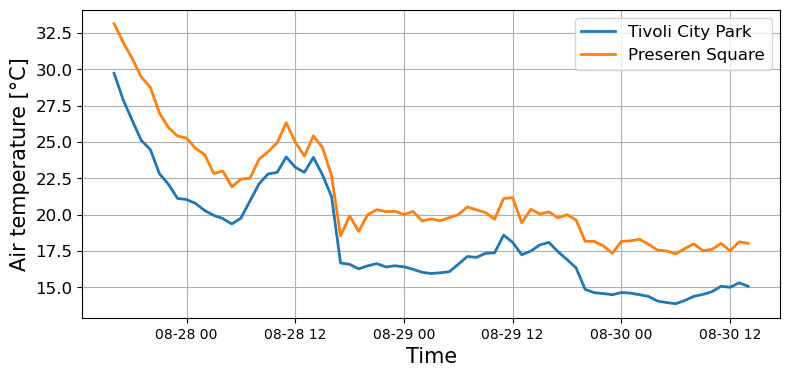

In [14]:
# plot the air temperature data of the two locations for the time horizon
plt.figure(figsize = (9,4))
plt.plot(pd.to_datetime(overview["time"]), overview["airTemperature"][0], label = "Tivoli City Park", linewidth = 2)
plt.plot(pd.to_datetime(overview["time"]), overview["airTemperature"][1], label = "Preseren Square", linewidth = 2)
plt.grid()
plt.legend(fontsize = 12)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Air temperature [\N{DEGREE SIGN}C]", fontsize = 15)
plt.yticks(fontsize = 12)
plt.show()